# N size for Montecarlo Simulation
4 April 2020

Cecilia García López de Munain

## Libraries

In [1]:
import os, sys
import math
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib as plt

## Parameters

In [2]:
sys.path.append('./')

In [3]:
PATH_ROOT_INPUT_DATA = 'data\\input\\N_Montecarlo'
INPUT_DATA_NAME = 'max_cases_results.xlsx'

In [4]:
CONFIDENCE = 0.99
HW = 1000000

## Import Data

In [5]:
results = pd.read_excel(os.path.join(PATH_ROOT_INPUT_DATA, INPUT_DATA_NAME))

### Plot

(0, 29608250.101099275)

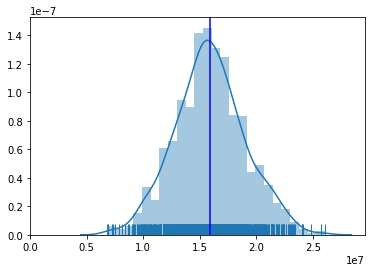

In [6]:
# Plot histogram and assign to ax
ax = sns.distplot(results, rug=True)

# Highlight mean
ax.axvline(results.mean().values, color='b')

# Set xlim
ax.set_xlim(0,)

In [7]:
print(np.quantile(results, 0.05))
print(np.quantile(results, 0.995))

10637950.911735961
24003033.217441257


## Compute initial parameters

In [8]:
N = len(results)
mean = np.mean(results.values)
stdev = np.std(results.values)

print('Size: ', N)
print('Mean: ', mean)
print('Standard Deviation: ', stdev)

print(stdev/mean)

Size:  1000
Mean:  15902047.134527432
Standard Deviation:  3105422.1345820036
0.1952844252259405


## Compute N for Montecarlo

In [9]:
def calc_N(HW, confidence=0.99):
    test_stat = - stats.norm.ppf((1-confidence)/2)
    N = (stdev * test_stat / HW ) ** 2
    
    return N

In [16]:
N = calc_N(HW, CONFIDENCE)
print('N needed: ', round(N,2))

N needed:  63.98


In [11]:
# test_stat = stats.norm.ppf((confidence)/2)
# lower_bound = mean - test_stat * stdev / math.sqrt(N)
# upper_bound = mean + test_stat * stdev / math.sqrt(N)

In [12]:
# print('Z score', test_stat)
# print(lower_bound)
# print(upper_bound)

### Plot

(0, 29608250.101099275)

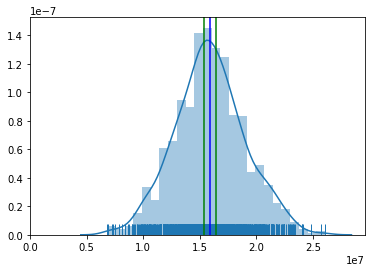

In [13]:
# Plot histogram and assign to ax
ax = sns.distplot(results, rug=True)

# Highlight mean
ax.axvline(mean, color='b')

# Highlight lower bound
ax.axvline(mean-HW/2, color='g')

# Highlight upper bound
ax.axvline(mean+HW/2, color='g')

# Set xlim
ax.set_xlim(0,)